C:\Users\yanni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yanni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yanni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yanni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

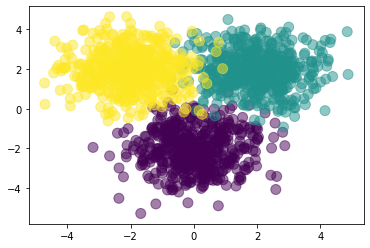

Accuracy: 0.3333333333333333
Accuracy: 0.3333333333333333
Accuracy: 0.3333333333333333
Accuracy: 0.7933333333333333
Accuracy: 0.9226666666666666
Accuracy: 0.936
Accuracy: 0.954
Accuracy: 0.9606666666666667
Accuracy: 0.964
Accuracy: 0.9666666666666667


In [1]:
# neural network in TensorFlow very simple example.
#
# the notes for this class can be found at: 
# https://deeplearningcourses.com/c/data-science-deep-learning-in-python
# https://www.udemy.com/data-science-deep-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# create random training data again
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1


# tensor flow variables are not the same as regular Python variables
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2


tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M]) # create symbolic variables
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=tfY,
    logits=logits
  )
) # compute costs
# WARNING: This op expects unscaled logits,
# since it performs a softmax on logits
# internally for efficiency.
# Do not call this op with the output of softmax,
# as it will produce incorrect results.

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
# input parameter is the learning rate

predict_op = tf.argmax(logits, 1)
# input parameter is the axis on which to choose the max

# just stuff that has to be done
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 100 == 0:
        print("Accuracy:", np.mean(Y == pred))